# Evaulation

This notebook is setup to help evaluate the runs

In [1]:
%matplotlib inline
from dotmap import DotMap
from envs import *
import os
import dill as pickle
import run_learning
import numpy as np
import run_eval
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from stable_baselines3 import SAC

# Find Desired Runs

In [2]:
def look_through_folders():
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            print("Eps: ", str(params.eps), ", Gamma: ", str(params.gamma), ", LearningRate: ", str(params.learning_rate))
            print("Eval_Freq: ", str(params.init_state))
#look_through_folders()

In [3]:
def check(params, trial_id):
    match = bool(1
        and params.id == 11
        and params.trial_id == trial_id
        #and params.algorithm == "SAC"
        #and not params.use_sde
        #and params.eps < 5
        )
        

    return match

def filt(check, trial_id):
    matches = []
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            if check(params, trial_id):
                matches.append(folder)
    return matches
filt(check, 0)

['03_01_2022_012030_Mohsin', '03_01_2022_001831_Mohsin']

# Evaluate Desired Runs

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN',

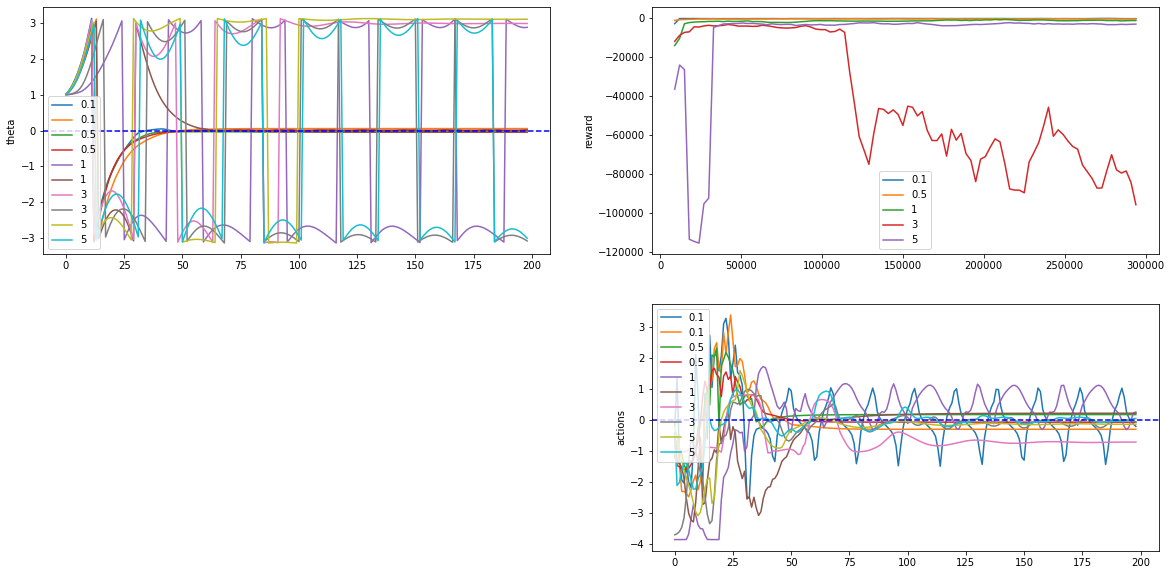

In [4]:
label = "eps"

def plot_eval():
    plt.figure()
    trial_id = 0
    runs = filt(check, trial_id)
    while runs:
        rew = []
        with open(os.path.join(os.path.join("./Runs", runs[0]), "params.pkl"), 'rb') as f:
            params = pickle.load(f) 
        for folder in runs:
            results = run_eval.evaluate(folder, init=[1, 0])
            tb = results["newpendulum"]["mean_reward"]
            tb_times = tb[0]
            tb_rew = [a[0] for a in tb[1]]
            
            rew.append(tb_rew)

            theta = results["newpendulum"]["thetas"]
            phi = results["newpendulum"]["phis"]
            actions = results["newpendulum"]["actions"]
            
            #plt.subplot(122)
            #plt.plot(tb_times[(n//2):-(n//2)], tb_smoothed, label=str(params[label]))
            #plt.plot(tb_times, tb_rew, label=str(params[label]))
            
            plt.subplot(221)
            plt.plot(theta, label=str(params[label]))
            #plt.subplot(223)
            #plt.plot(phi, label=str(params[label]))
            plt.subplot(224)
            plt.plot(actions, label=str(params[label]))
            
        rew_avg = np.mean(rew, axis=0)        
        n=5
        tb_smoothed = np.cumsum(rew_avg, dtype=float)
        tb_smoothed[n:] = tb_smoothed[n:] - tb_smoothed[:-n]
        tb_smoothed =  tb_smoothed[n - 1:] / n
        
        plt.subplot(222)
        plt.plot(tb_times[(n//2):-(n//2)], tb_smoothed, label=str(params[label]))
        #plt.plot(tb_times, rew_avg, label=str(params[label]))
        
        trial_id += 1
        runs = filt(check, trial_id)
        


    plt.subplot(222)
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(221)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("theta")
    plt.legend()
    #plt.subplot(223)
    #plt.axhline(y=0, color='b', linestyle='--')
    #plt.ylabel("phi")
    plt.legend()
    plt.subplot(224)
    plt.axhline(y=0, color='b', linestyle='--')
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval()

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


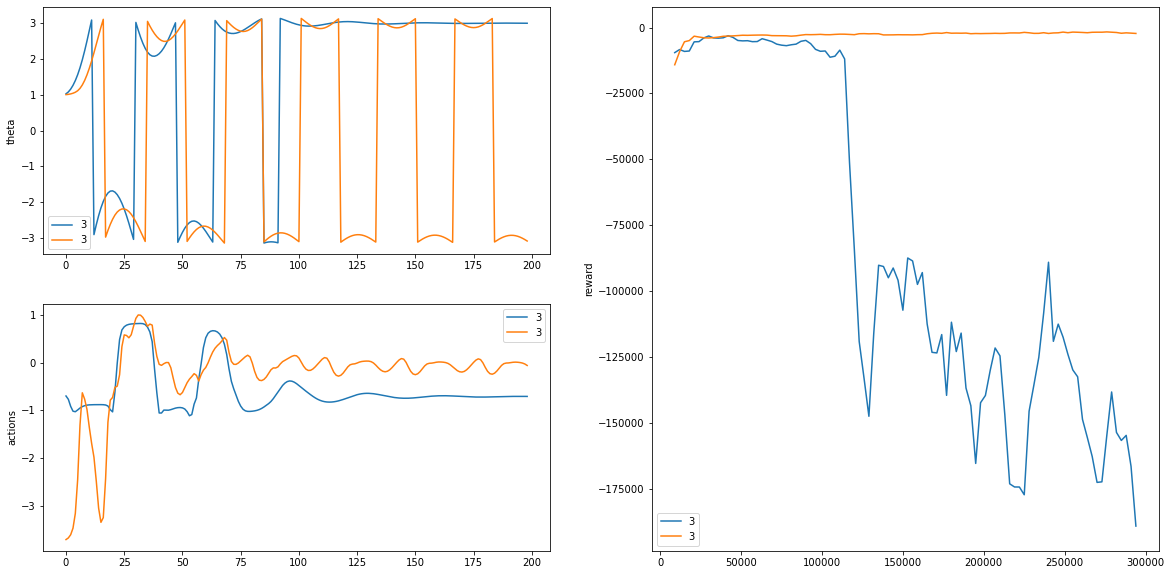

In [8]:
label = "eps"

def plot_eval():
    plt.figure()
    runs = filt(check, 3)
    for folder in runs:
        with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
            params = pickle.load(f) 
        results = run_eval.evaluate(folder, init=[1, 0])
        tb = results["newpendulum"]["mean_reward"]
        tb_times = tb[0]
        tb_rew = [a[0] for a in tb[1]]

        theta = results["newpendulum"]["thetas"]
        actions = results["newpendulum"]["actions"]
        
        n=5
        tb_smoothed = np.cumsum(tb_rew, dtype=float)
        tb_smoothed[n:] = tb_smoothed[n:] - tb_smoothed[:-n]
        tb_smoothed =  tb_smoothed[n - 1:] / n
        
        plt.subplot(122)
        plt.plot(tb_times[(n//2):-(n//2)], tb_smoothed, label=str(params[label]))

        plt.subplot(221)
        plt.plot(theta, label=str(params[label]))
        plt.subplot(223)
        plt.plot(actions, label=str(params[label]))       


    plt.subplot(122)
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(221)
    plt.ylabel("theta")
    plt.legend()
    plt.subplot(223)
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval()

# Rendering Station

DON"T USE YET, BEHAVIOR NOT WORKING

In [10]:
folder = '02_14_2022_123836_Mohsin'
env_name = 'newpendulum'
model_name = 'best_model'
with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
            params = pickle.load(f)
env = params.envs[env_name].eval_env(params)
env.reset()
models_path = os.path.join(os.path.join("./Runs", folder), env_name + "/models")
model = SAC.load(os.path.join(models_path, model_name))

obs = env.reset()
done = False
i = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    #env.render()

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


UnboundLocalError: local variable 'costs' referenced before assignment